# Hybrid document search with VLM-1 and MongoDB 

We're going to extend our workflow for finance presentations to incorporate [MongoDB](https://mongodb.com/), allowing us to store 
the embedded documents and extracted metadata simultaneously in a single data store for a variety of 
different retrieval flows. For instance, we'll be able to perform filtered language search using our schema.

As before, we're going to use slides from [SEC Edgar database](https://www.sec.gov/edgar.shtml).

In [1]:
# Install dependencies if needed
!pip install requests Pillow

As with the financial data example, we ping the API endpoint and make sure its working.

In [2]:
import json
import os
import requests


VLM_BASE_URL = "https://vlm-dev.nos.run/v1"
response = requests.get(f"{VLM_BASE_URL}/health")
response.raise_for_status()
assert response.status_code == 200

In [6]:
import getpass

VLM_API_KEY = os.getenv("VLM_API_KEY", None)
if VLM_API_KEY is None:
    VLM_API_KEY = getpass.getpass()
print(f"Using API key: {VLM_API_KEY[:4]}...")

Using API key: sk-s...


In [7]:
headers = {
    "Content-Type": "application/json",
    "X-API-Key": VLM_API_KEY,
}
response = requests.get(f"{VLM_BASE_URL}/models", headers=headers)
response.raise_for_status()

In [8]:
print(json.dumps(response.json(), indent=2))

[
  {
    "model": "vlm-1",
    "domain": "tv.news"
  },
  {
    "model": "vlm-1",
    "domain": "document.presentation"
  },
  {
    "model": "vlm-1",
    "domain": "sports.nfl"
  },
  {
    "model": "vlm-1",
    "domain": "sports.nba"
  },
  {
    "model": "vlm-1",
    "domain": "web.ecommerce-product-catalog"
  }
]


Borrow the helper functions from financial data notebook so we don't need other dependencies.

In [9]:
# %load ../vlm_tools/image.py
import json
from base64 import b64encode
from io import BytesIO
from typing import Literal, Union

import requests
from PIL import Image


def pprint(data):
    print(json.dumps(data, indent=2))


def encode_image(
    image: Image.Image, format: Literal["PNG", "JPEG"] = "PNG"
) -> Union[str, bytes]:
    """Convert an image to a base64 string."""
    buffered = BytesIO()
    image_format = image.format or format
    image.save(buffered, format=image_format)
    img_str = b64encode(buffered.getvalue()).decode()
    return f"data:image/{image_format.lower()};base64,{img_str}"


def download_image(url: str) -> Image.Image:
    """Download an image from a URL."""
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
    }
    bytes = BytesIO(requests.get(url, headers=headers).content)
    bytes.seek(0)
    return Image.open(bytes).convert("RGB")


In [10]:
from pathlib import Path
from typing import Union

from PIL import Image
from IPython.display import display


def vlm(image: Image.Image, domain: str):
    """Send an image to the VLM API."""
    data = {
        "model": "vlm-1",
        "domain": domain,
        "image": encode_image(image),
    }
    response = requests.post(f"{VLM_BASE_URL}/generate", headers=headers, json=data)
    response.raise_for_status()
    return response.json()


def vlm_visualize(image: Union[Image.Image, str, Path], domain: str):
    """Send an image to the VLM API and display the result."""
    if isinstance(image, str) and image.startswith("http"):
        image = download_image(image)
    elif isinstance(image, (str, Path)):
        if not Path(image).exists():
            raise FileNotFoundError(f"File not found {image}")
        image = Image.open(str(image)).convert("RGB")
    elif isinstance(image, Image.Image):
        image = image.convert("RGB")
    else:
        raise ValueError("Invalid image, must be a path, PIL Image or URL")

    display(image)
    result = vlm(image, domain)
    pprint(result)

In [11]:
URLS = [
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve001.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve002.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve003.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve004.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve005.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve006.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve007.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve008.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve009.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve010.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve011.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve012.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve013.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve014.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve015.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve016.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve017.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve018.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve019.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve020.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve021.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve022.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve023.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve024.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve025.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve026.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve027.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve028.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve029.jpg",
    "https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve030.jpg",
]

Now, let's extract some information from a financial presentation on [SEC EDGAR](https://www.sec.gov/edgar/search-and-access).

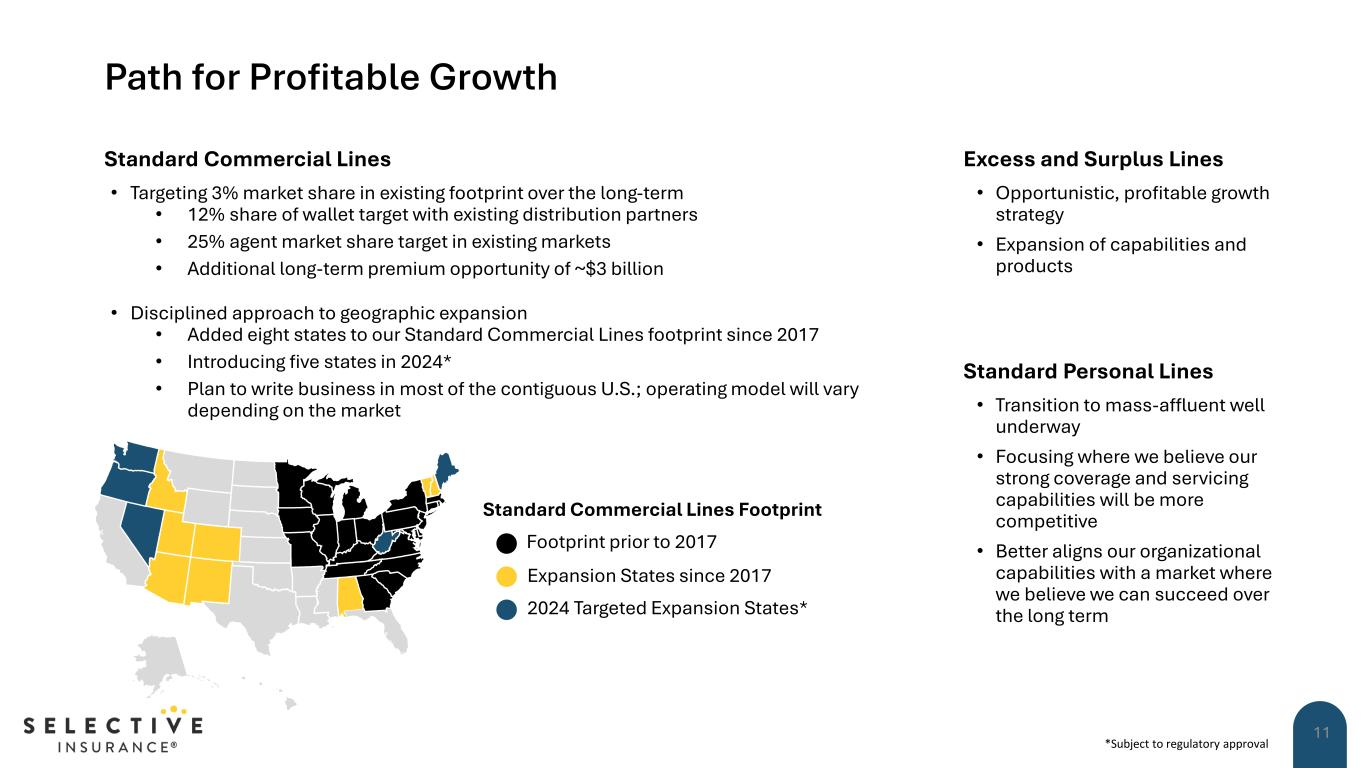

{
  "title": "Path for Profitable Growth",
  "description": "The image presents a strategic overview for profitable growth in various commercial and personal lines of insurance. It includes market share targets, geographic expansion plans, and strategic focuses for different lines of insurance.",
  "page_number": 11,
  "plots": null,
  "tables": null,
  "quotes": null,
  "others": [
    {
      "markdown": "### Standard Commercial Lines\n- Targeting 3% market share in existing footprint over the long-term\n  - 12% share of wallet target with existing distribution partners\n  - 25% agent market share target in existing markets\n  - Additional long-term premium opportunity of ~$3 billion\n- Disciplined approach to geographic expansion\n  - Added eight states to our Standard Commercial Lines footprint since 2017\n  - Introducing five states in 2024*\n  - Plan to write business in most of the contiguous U.S.; operating model will vary depending on the market\n\n### Excess and Surplus Lines

In [12]:
url = URLS[10]
vlm_visualize(url, domain="document.presentation")

Ok, now lets set up our Mongo DB and embed a few of these slides, then try out a language query.

In [14]:
from tqdm import tqdm

records = []
for url in tqdm(URLS):
    result = vlm(download_image(url), domain="document.presentation")
    records.append({"url": url, "result": result})

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [03:13<00:00,  6.45s/it]


In [15]:
records[:2]

[{'url': 'https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve001.jpg',
  'result': {'title': '1st Quarter 2024 Investor Presentation',
   'description': "The image shows the front of a building with a sign that reads 'Selective Insurance'. The building features a modern design with large glass windows and a brick facade. The image is labeled as part of the 1st Quarter 2024 Investor Presentation for Selective Insurance.",
   'page_number': None,
   'plots': None,
   'tables': None,
   'quotes': None,
   'others': [{'markdown': "![Selective Insurance Building](image_url) The building shown is modern with large glass windows and a brick facade, prominently featuring the 'Selective Insurance' sign.",
     'caption': 'Front view of Selective Insurance building.',
     'title': 'Selective Insurance Building'}]}},
 {'url': 'https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve002.jpg',
  'result': {'title': 'Safe Harb

In [17]:
!pip install "pymongo[srv]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 3.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.3/486.3 kB 19.3 MB/s eta 0:00:00


In [19]:
import os
from dotenv import load_dotenv
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi

load_dotenv(".env")

mongodb_uri = os.getenv("MONGODB_URI", None)
if mongodb_uri is None:
    mongodb_uri = getpass.getpass()

# Create a new client and connect to the server
client = MongoClient(mongodb_uri, server_api=ServerApi('1'))
# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

Pinged your deployment. You successfully connected to MongoDB!


In [20]:
DB_NAME = "autonomi-vlm-dev"
COLLECTION_NAME = "vlm_1_financial_presentations"

# Delete all records from the collection
client[DB_NAME][COLLECTION_NAME].delete_many({})

# Insert the records
client[DB_NAME][COLLECTION_NAME].insert_many(records)

InsertManyResult([ObjectId('6642f70eea371d0e9c98c364'), ObjectId('6642f70eea371d0e9c98c365'), ObjectId('6642f70eea371d0e9c98c366'), ObjectId('6642f70eea371d0e9c98c367'), ObjectId('6642f70eea371d0e9c98c368'), ObjectId('6642f70eea371d0e9c98c369'), ObjectId('6642f70eea371d0e9c98c36a'), ObjectId('6642f70eea371d0e9c98c36b'), ObjectId('6642f70eea371d0e9c98c36c'), ObjectId('6642f70eea371d0e9c98c36d'), ObjectId('6642f70eea371d0e9c98c36e'), ObjectId('6642f70eea371d0e9c98c36f'), ObjectId('6642f70eea371d0e9c98c370'), ObjectId('6642f70eea371d0e9c98c371'), ObjectId('6642f70eea371d0e9c98c372'), ObjectId('6642f70eea371d0e9c98c373'), ObjectId('6642f70eea371d0e9c98c374'), ObjectId('6642f70eea371d0e9c98c375'), ObjectId('6642f70eea371d0e9c98c376'), ObjectId('6642f70eea371d0e9c98c377'), ObjectId('6642f70eea371d0e9c98c378'), ObjectId('6642f70eea371d0e9c98c379'), ObjectId('6642f70eea371d0e9c98c37a'), ObjectId('6642f70eea371d0e9c98c37b'), ObjectId('6642f70eea371d0e9c98c37c'), ObjectId('6642f70eea371d0e9c98c3

In [21]:
# Count the number of records
client[DB_NAME][COLLECTION_NAME].count_documents({})

30

In [24]:
# Query the collection where the page title contains "overview" without case sensitivity
query = {"result.title": {"$regex": "overview", "$options": "i"}}
list(client[DB_NAME][COLLECTION_NAME].find(query))

[{'_id': ObjectId('6642f70eea371d0e9c98c376'),
  'url': 'https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve019.jpg',
  'result': {'title': 'Financial Overview',
   'description': "This image shows a slide titled 'FINANCIAL OVERVIEW' from a presentation by Selective Insurance. The slide features a modern, spacious hallway with a polished wooden floor, large windows, and historical exhibits including a vintage bicycle. The setting suggests a blend of modern corporate environment with historical elements, reflecting the company's heritage and current status.",
   'page_number': 19,
   'plots': None,
   'tables': None,
   'quotes': None,
   'others': [{'markdown': "The image displays a corporate setting with a title 'FINANCIAL OVERVIEW' prominently displayed at the top. The environment combines modern architectural elements with historical displays, indicating a corporate heritage. A vintage bicycle and historical panels are visible, suggesting a con

In [25]:
# Find slides between page-number 3-5
query = {"result.page_number": {"$gte": 3, "$lte": 5}}
list(client[DB_NAME][COLLECTION_NAME].find(query))

[{'_id': ObjectId('6642f70eea371d0e9c98c366'),
  'url': 'https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve003.jpg',
  'result': {'title': 'Introduction',
   'description': "This image shows the interior of a modern office building with a focus on a lobby area. The image is in black and white, featuring a spacious area with a high ceiling, glass walls, and a mix of brick and drywall partitions. There are several seating areas with stylish chairs and a large plant visible through the glass partition. The floor is covered with wood paneling, and there is a door leading to another part of the building. The logo of 'Selective Insurance' is visible on a wall plaque, suggesting the setting is within their office. The word 'INTRODUCTION' is prominently displayed in large white letters, indicating this image might be used as a title or introductory slide in a presentation.",
   'page_number': 3,
   'plots': None,
   'tables': None,
   'quotes': None,
   

In [37]:
# Find slides where at least one plot is a pie chart
query = {"result.plots.type": "pie"}
list(client[DB_NAME][COLLECTION_NAME].find(query))

[{'_id': ObjectId('6642f70eea371d0e9c98c36a'),
  'url': 'https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve007.jpg',
  'result': {'title': 'Differentiated Operating Model',
   'description': 'This document page presents the operating model of Selective Insurance, highlighting its unique, locally based field model and franchise value distribution model with high-quality partners. It also includes a pie chart showing the 2023 net premiums written, totaling $4 billion, distributed across different lines of insurance.',
   'page_number': 7,
   'plots': [{'type': 'pie',
     'title': '2023 Net Premiums Written',
     'description': 'The pie chart displays the distribution of net premiums written in 2023 totaling $4 billion. It shows that 79% of the premiums are from Standard Commercial Lines, 10% from Standard Personal Lines, and 11% from Excess and Surplus Lines.',
     'markdown': '| Category                | Percentage |\n|-------------------------

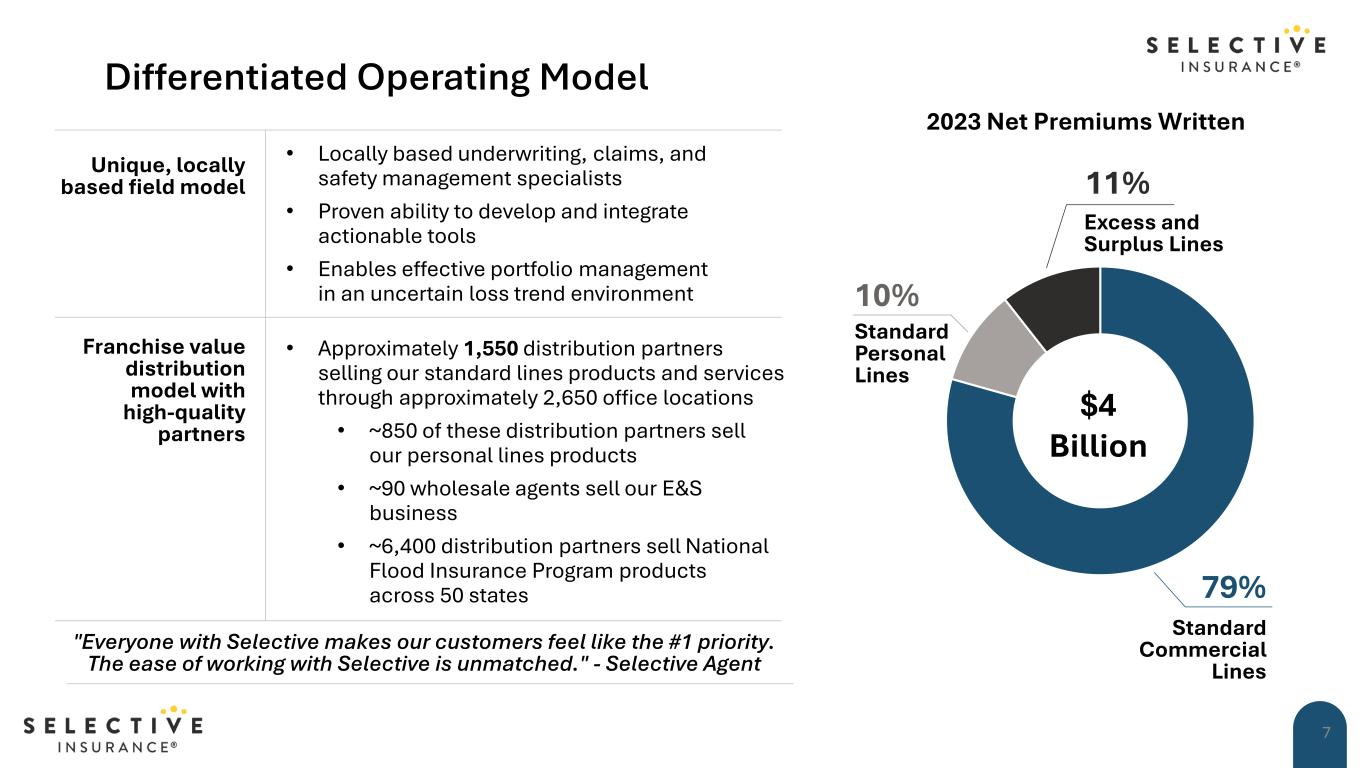

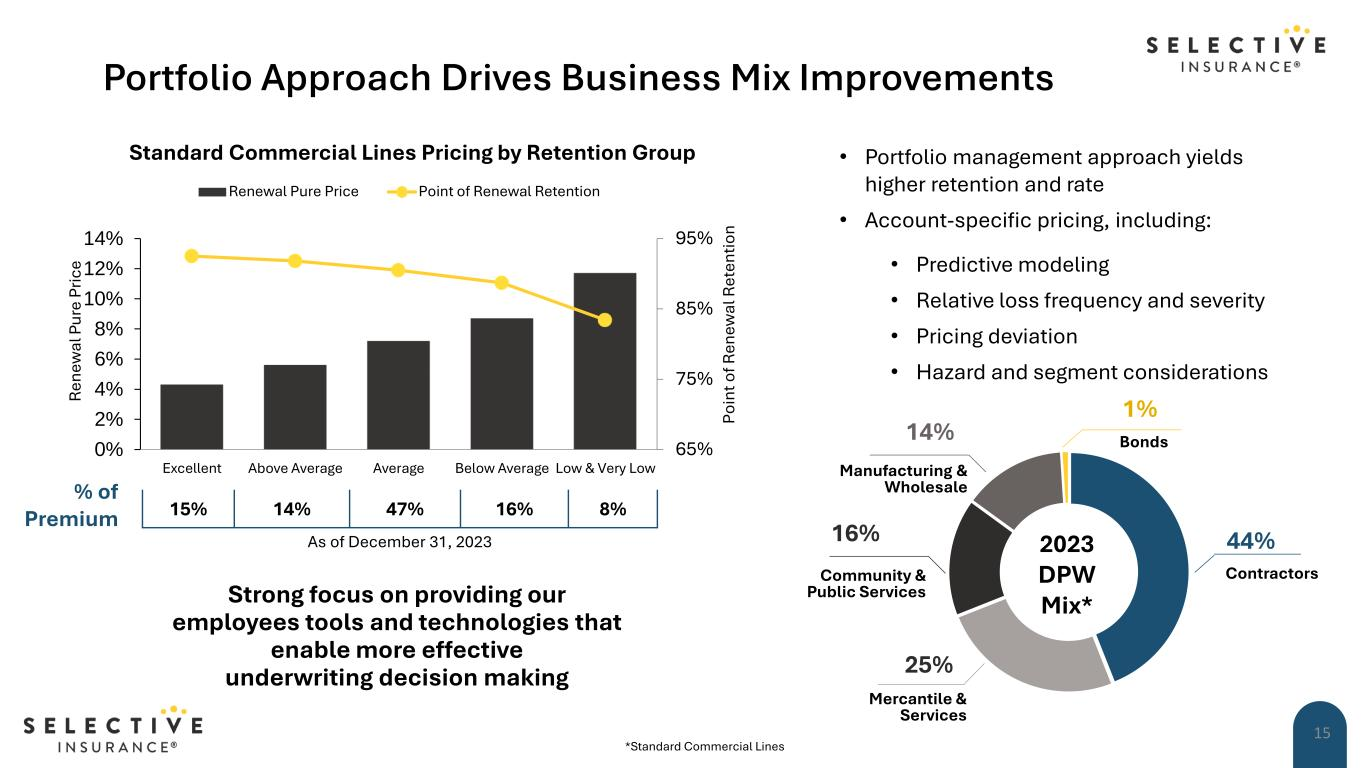

In [38]:
for record in client[DB_NAME][COLLECTION_NAME].find(query):
    display(download_image(record['url']))

In [39]:
# Find the specicfic slide within which a plot whose title is "2023 DPW Mix"
query = {"result.plots.title": "2023 DPW Mix"}
list(client[DB_NAME][COLLECTION_NAME].find(query))

[{'_id': ObjectId('6642f70eea371d0e9c98c372'),
  'url': 'https://www.sec.gov/Archives/edgar/data/230557/000023055724000007/sigifirstquarter2024inve015.jpg',
  'result': {'title': 'Portfolio Approach Drives Business Mix Improvements',
   'description': 'The image presents a slide from a presentation by Selective Insurance, detailing their portfolio approach to business mix improvements. It includes a bar graph and a pie chart, along with textual information about their pricing strategies and business segment distribution.',
   'page_number': 15,
   'plots': [{'type': 'bar',
     'title': 'Standard Commercial Lines Pricing by Retention Group',
     'description': 'A bar graph showing the renewal pure price for different retention groups categorized as Excellent, Above Average, Average, Below Average, and Low & Very Low. It also includes a line graph overlay showing the point of renewal retention percentages for these groups.',
     'markdown': '| Retention Group | Renewal Pure Price | Po

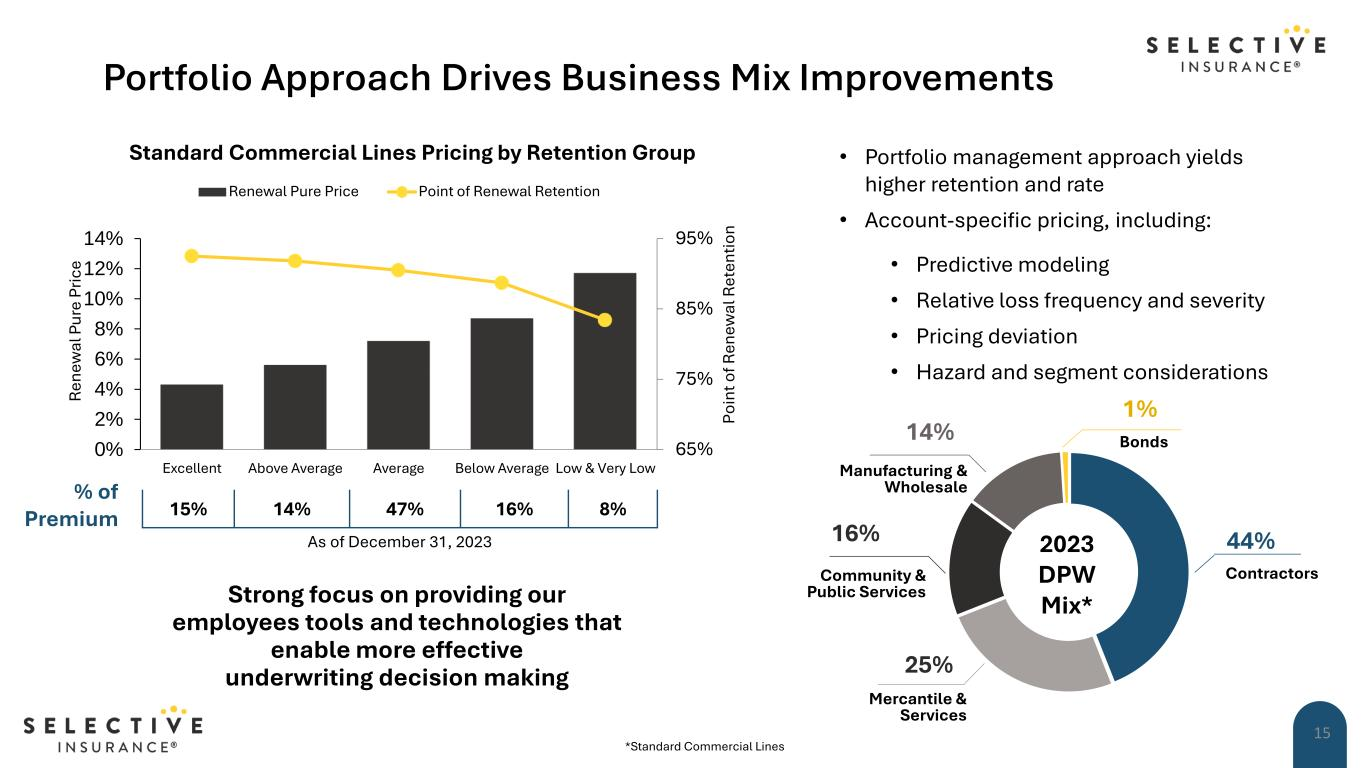

In [40]:
# Display the image of the slide and provide the description of the plot
record, = client[DB_NAME][COLLECTION_NAME].find(query)
display(download_image(record['url']))

In [42]:
# Let's find the specific plot within the slide
plot = next(plot for plot in record['result']['plots'] if plot['title'] == "2023 DPW Mix")
pprint(plot)

{
  "type": "pie",
  "title": "2023 DPW Mix",
  "description": "A pie chart illustrating the distribution of Direct Premium Written (DPW) across different business segments in 2023. The segments include Contractors, Manufacturing & Wholesale, Community & Public Services, Mercantile & Services, and Bonds.",
  "markdown": "| Business Segment           | Percentage |\n|----------------------------|------------|\n| Contractors                | 44%        |\n| Manufacturing & Wholesale  | 14%        |\n| Community & Public Services| 16%        |\n| Mercantile & Services      | 25%        |\n| Bonds                      | 1%         |",
  "caption": null
}


In [67]:
from io import StringIO
import pandas as pd

# Load the data into a pandas DataFrame
df = pd.read_csv(
    StringIO(plot['markdown'].replace(' ', '')),  # Get rid of whitespaces
    sep='|',
).dropna(
    axis=1,
    how='all'
).iloc[1:]
df["Percentage"] = df["Percentage"].str.rstrip("%").astype(float)

In [69]:
# Display the DataFrame using plotly
import plotly.express as px

fig = px.pie(df, values='Percentage', names='BusinessSegment', title=plot['title'], hole=0.5)
fig.show()